# Pandas數據分析

今天介紹資料分析近來很紅的 pandas 套件, 作者是 Wes McKinney。Python 會成為一個數據分析的熱門語言, 和 pandas 的出現也有相當的關係。

但是 pandas 雖然功能強, 但有些地方沒那麼直覺, 有時會讓大家以為是個深奧的套件。其實你大約可以把 pandas 想成「Python 的 Excel」, 但是功能更強、更有彈性、也有更多的可能性。

下面介紹個基本上就是把 pandas 當 Excel 學的影片, 相信大家會覺得很親切。<br>
https://youtu.be/9d5-Ti6onew

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## 1 開始使用 `pandas`

首先我們來讀入一個 CSV 檔, 這裡有個「假的」學測成績, 叫 `grades.csv` 我們來練習一下。

In [3]:
df = pd.read_csv("./data/grades.csv")

用 `df` 是標準的叫法 (雖然這名稱我們隨便取也可以), 意思是 Data Frame, 這是 `pandas` 兩大資料結構之一。我們可以把 Data Frame 想成一張表格 (雖然其實可以是很多張表格)。

我們來看看我們 `df` 的前五筆資料。

In [4]:
df.head()

,姓名,國文,英文,數學,自然,社會
0,劉俊安,9,10,15,10,13
1,胡玉華,10,10,10,8,9
2,黃淑婷,13,15,8,11,14
3,陳上紫,10,10,8,9,14
4,崔靜成,13,12,14,12,13


如果你曾經手動讀入 CSV 檔, 就知道這省了多少事 (雖然我個人還挺喜歡純手動帶進 CSV)。

#### Excel 檔也可以快速讀入

不只 CSV 檔, 很多資料檔案, 像 Excel 檔都很容易在 `pandas` 完成。使用法是這樣:

    df2 = pd.read_excel('filename.xls', 'sheetname')
    
其中 sheetname 那裡要放工作表的名稱, 如果是中文的最好改成英文。

## 2 Pandas 基本資料結構

Pandas 有兩個基本資料結構:

* <b style="color:red;">DataFrame</b>: 可以想成一個表格。
* <b style="color:red;">Series</b>: 表格的某一列、某一行, 基本上就是我們以前的 list 或 array

一個 DataFrame, 我們有 `index` (列的名稱), `columns` (行的名稱)。

#### DataFrame

![DataFrame 的結構](images/indexcol.png)

#### Series

剛剛說 series 大概就是一個 list, 一個 array。其實更精準的說, 其實是一個有 "index" 的 array。

DataFrame 的每一行或每一列其實也都是一個 series。我們來看個例子, 例如所有同學的國文成績, 就是一個 series。

In [5]:
df["國文"]

0      9
1     10
2     13
3     10
4     13
      ..
95     9
96     8
97    14
98    15
99     9
Name: 國文, Length: 100, dtype: int64

在 Python 3 中, 我們終於可以和英文同步, 用這種很炫的方式叫出所有國文成績。

#### 資料畫出來

要畫個圖很容易。

<AxesSubplot:>

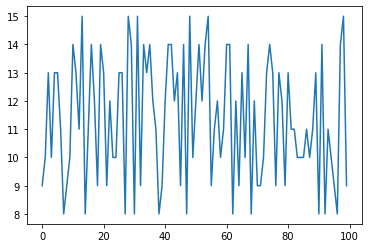

In [6]:
df["國文"].plot()

當然, 在這個例子中, 其實畫 histogram 圖更有意義一點。

<AxesSubplot:>

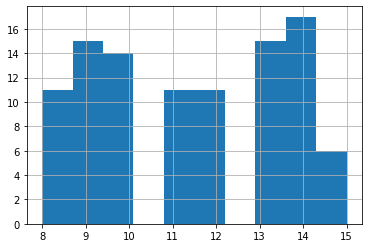

In [7]:
df["國文"].hist()

## 3 一些基本的資料分析

算平均。

In [8]:
df["國文"].mean()

11.39

算標準差。

In [9]:
df["國文"].std()

2.1968526614594834

不如就該算的都幫我們算算...

In [10]:
df.describe()

,國文,英文,數學,自然,社會
count,100.000000,100.000000,100.000000,100.00000,100.00000
mean,11.390000,11.380000,11.570000,11.03000,11.83000
std,2.196853,2.273164,2.310516,2.21772,2.48655
min,8.000000,8.000000,8.000000,8.00000,8.00000
25%,9.000000,9.000000,10.000000,9.00000,9.00000
50%,11.000000,11.000000,11.000000,11.00000,12.00000
75%,13.000000,13.000000,14.000000,13.00000,14.00000
max,15.000000,15.000000,15.000000,15.00000,15.00000


有時我們很愛看的相關係數矩陣。

In [11]:
df.corr()

,國文,英文,數學,自然,社會
國文,1.000000,0.160158,-0.310899,-0.110236,-0.028421
英文,0.160158,1.000000,0.025656,0.113929,-0.063512
數學,-0.310899,0.025656,1.000000,0.014371,0.041651
自然,-0.110236,0.113929,0.014371,1.000000,-0.156594
社會,-0.028421,-0.063512,0.041651,-0.156594,1.000000


只算兩科間的相關係數當然也可以。

## 4 增加一行

### 【技巧】

我們增加一行, 加入總級分。

In [12]:
df["總級分"]=df.sum(axis=1)
df

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
1,胡玉華,10,10,10,8,9,47
2,黃淑婷,13,15,8,11,14,61
3,陳上紫,10,10,8,9,14,51
4,崔靜成,13,12,14,12,13,64
...,...,...,...,...,...,...,...
95,蔡佳燕,9,10,9,13,14,55
96,吳筱婷,8,10,14,10,15,57
97,陳家銘,14,9,11,8,12,54
98,李明威,15,9,8,9,15,56


### 【技巧】

有計算的當然也可以的。

## 5 排序和 index 重設

### 【重點】排序的方法

我們依總級分來排序。

### 【重點】排序的方法

加權分最高, 同分才看總級分

### 【重點】重設 index

## 6 篩出我們要的資料

基本上和 NumPy 的 array 篩法很像。

### 【重點】

找出數學滿級分同學。

In [13]:
df[df.數學==15]

,姓名,國文,英文,數學,自然,社會,總級分
0,劉俊安,9,10,15,10,13,57
24,陳竹伯,10,12,15,10,14,61
36,詹威德,12,13,15,10,14,64
37,曾怡君,11,12,15,13,14,65
39,段冠廷,9,8,15,12,15,59
59,芮秋辛,11,10,15,10,8,54
67,林哲法,14,9,15,10,14,62
70,葉儀依,9,13,15,8,14,59
73,吳志遠,13,15,15,8,8,59
76,周育霖,9,12,15,13,12,61


### 【重點】

找出數學和英文都滿級分的同學。要注意 `and` 要用 `&`, `or` 要用 `|`。每個條件一定要加弧號。

In [14]:
df[(df.數學==15)&(df.英文==15)]

,姓名,國文,英文,數學,自然,社會,總級分
73,吳志遠,13,15,15,8,8,59


## 7 刪除一行或一列

### 【重點】刪掉一行

我們來刪掉總級分的那行。

### 【重點】改變原有的 DataFrame

我們會發現 `pandas` 很多動作都沒有更改原有的 DataFrame, 真的要改要加入

    inplace=True

### 【重點】刪掉一列

刪掉列就是指定要刪去的 index。

### 【重點】刪掉一列

通常刪掉符合條件的比較合理 (注意是找到要刪掉的部份, 再找出相對的 index)。

## 8 真實股價資料

有個從 `Pandas` 獨立出來的套件叫 `pandas-datareader`, 幾經波折, 先是 Yahoo! 的財務資料不能用, 後來又是 Google 的資料不能用, 不過至少現在看來 Yahoo! 還可以使用。

安裝 `pandas-datareader` 就標準 `conda` 安裝:

    conda install pandas-datareader
    
如果裝過, 但很久沒更新就用:

    conda update pandas-datareader

### 【例子】 分析 Apple 股價

In [15]:
!easy_install pip

Searching for pip
Best match: pip 21.3
Processing pip-21.3-py3.7.egg
pip 21.3 is already the active version in easy-install.pth
Installing pip-script.py script to C:\anaconda\Scripts
Installing pip.exe script to C:\anaconda\Scripts
Installing pip3-script.py script to C:\anaconda\Scripts
Installing pip3.exe script to C:\anaconda\Scripts
Installing pip3.9-script.py script to C:\anaconda\Scripts
Installing pip3.9.exe script to C:\anaconda\Scripts

Using c:\anaconda\lib\site-packages\pip-21.3-py3.7.egg
Processing dependencies for pip
Finished processing dependencies for pip


In [16]:
!pip install pandas_datareader

In [17]:
import pandas_datareader as pdr
df = pdr.get_data_yahoo('9940.tw')

In [58]:
# 為防止網路有問題, 我們把這個檔案以 aapl.csv 存起來, 可以這樣讀入。
# df = pd.read_csv('data/aapl.csv', index_col="Date")

In [18]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-10-14,25.296001,24.867256,25.210253,24.910130,185424.0,18.348282
2016-10-17,25.124502,24.695757,24.910130,24.910130,29704081.0,18.348282
2016-10-18,25.296001,24.953005,24.953005,25.296001,642571.0,18.632507
2016-10-19,25.338877,25.167377,25.296001,25.167377,241401.0,18.537767
2016-10-20,25.167377,24.953005,25.167377,25.038754,256562.0,18.443026
...,...,...,...,...,...,...
2021-10-06,31.350000,31.049999,31.299999,31.299999,458076.0,31.299999
2021-10-07,31.799999,31.350000,31.400000,31.450001,1172070.0,31.450001
2021-10-08,31.799999,31.450001,31.549999,31.750000,591203.0,31.750000


#### 只要最後 300 個交易日!

In [19]:
df.tail

<bound method NDFrame.tail of                  High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2016-10-14  25.296001  24.867256  25.210253  24.910130    185424.0  18.348282
2016-10-17  25.124502  24.695757  24.910130  24.910130  29704081.0  18.348282
2016-10-18  25.296001  24.953005  24.953005  25.296001    642571.0  18.632507
2016-10-19  25.338877  25.167377  25.296001  25.167377    241401.0  18.537767
2016-10-20  25.167377  24.953005  25.167377  25.038754    256562.0  18.443026
...               ...        ...        ...        ...         ...        ...
2021-10-06  31.350000  31.049999  31.299999  31.299999    458076.0  31.299999
2021-10-07  31.799999  31.350000  31.400000  31.450001   1172070.0  31.450001
2021-10-08  31.799999  31.450001  31.549999  31.750000    591203.0  31.750000
2021-10-12  33.599998  31.549999  31.700001  33.549999   3102958.0  33.549999
2021-10-13  33.849998  32.750000  

#### 20 日的移動平均

<AxesSubplot:xlabel='Date'>

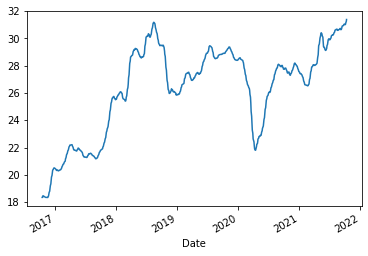

In [20]:
c_price_20 = df["Adj Close"].rolling(20, min_periods=1).mean()
c_price_20.plot()

#### 20 日和 60 日的移動平均

<AxesSubplot:xlabel='Date'>

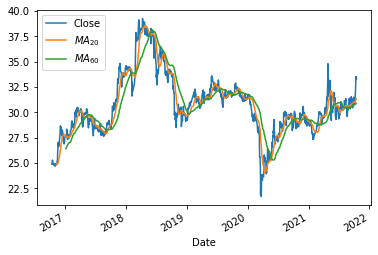

In [21]:
df.Close.plot(legend=True)
df.Close.rolling(20).mean().plot(label="$MA_{20}$",legend=True)
df.Close.rolling(60).mean().plot(label="$MA_{60}$",legend=True)

#### 準備做預測

我們用個非常天真的模型...

![天真股票模型](images/naive.png)

網路上說這是線性的 (可能嗎)!


哦, 真的有點像線性的, 我們之後用線性迴歸試試看。

## 9 手工打造一個 DataFrame*

有時我們用手工打造一個簡單的 DataFrame, 可以更理解整個結構。其實很容易, 一個 DataFrame 基本上就包含兩個主要部份:

* 資料本身: 通常一個二維陣列 (矩陣)
* 行、列的名稱

我們來個簡單的小例子。

In [23]:
mydata = np.random.randn(4,3)
mydata

array([[ 1.1669569 ,  1.4436057 ,  1.50419558],
       [-0.79525509,  0.04602164, -0.52385993],
       [ 0.78625548, -0.67367943,  0.19069843],
       [-0.04511102, -1.08881099,  2.24451442]])

把行列的名字放進去, 就成一個 DataFrame。我們列的部份先讓 Python 自己產生。

In [24]:
df2 = pd.DataFrame(mydata, columns=list("ABC"))

In [25]:
df2

,A,B,C
0,1.166957,1.443606,1.504196
1,-0.795255,0.046022,-0.523860
2,0.786255,-0.673679,0.190698
3,-0.045111,-1.088811,2.244514


#### 兩個表格上下貼起來

我們再來生一個 DataFrame, 再「貼」起來。

In [26]:
df3 = pd.DataFrame(np.random.randn(3,3), columns=list("ABC"))

In [27]:
df3

,A,B,C
0,-1.147025,0.784523,0.258159
1,1.611578,-1.209507,-0.743638
2,-1.385019,0.360312,-1.339725


前面我們弄得亂七八糟的 index 重設一下。

等等, 這大小好像不太對也可以嗎? 答案是可以的!

#### 大一點的例子

我們來做前面「假的」學測資料。首先要有「假的」同學名單, 如果有興趣產生很多名字, 可以用這個服務。

[中文姓名產生器](http://www.richyli.com/name/index.asp)

In [40]:

path = 'D:/privite/台大資訊系統訓練班/347期Python 機器學習/Unit 2 - Data Analysis Package/Unit02/data/姓名100.txt'
f = open(path, 'r',encoding="utf-8")
f
print(f.read())
f.close()

黃孟勳, 黃右孝, 蔡佩富, 劉光旭, 陳智易, 葉喜廷, 王嘉幸, 陳秋吉, 劉淑慧, 何志宏, 林俞誠, 蔡秀芬, 黃佩君, 李玉鳳, 黃昆禾, 周盈甄, 吳昱廷, 賁凡弘, 林宏達, 呂俊宏, 蕭武姍, 張耀文, 袁依芷, 王雅惠, 李明士, 杜心怡, 張世昌, 李火甫, 姚雅芳, 蔡淑玲, 吳佩欣, 楊偉誠, 曹堅廷, 闞品昀, 權佳甫, 林韋忠, 楊馥龍, 賴俊賢, 林建啟, 卓大星, 王萱博, 陳玉芳, 張佩如, 林冠軍, 張智海, 惠景翔, 王麗蓮, 黃妙康, 鄭雪伶, 林威廷, 謝秉勳, 王揚霖, 張奕辰, 黃士甫, 吳立元, 黃玲儀, 隆江岳, 何雅玲, 徐辰冰, 張廷紹, 戈秉江, 楊雅慧, 周先駿, 李冠中, 鄧伯容, 黃明軒, 黃惠虹, 林淑萍, 羅少華, 郭雅惠, 林美玲, 陳原智, 許惠文, 林千山, 畢哲樺, 郭淑芬, 陳文倩, 陳瑩桓, 賴岱東, 吳佳如, 杜威廷, 陳家維, 潘雅鈴, 賴建來, 侯淑婷, 陳志偉, 吳左萍, 林家菁, 林智傑, 吳欣怡, 李政倩, 閔思翰, 趙淑芬, 詹俐成, 錢宗穎, 謝秀玲, 陳牧秀, 黃翰佐, 張志忠, 魏少心


In [42]:

df = pd.read_csv(
    './data/姓名100.txt', sep=" ",header=None)
print(df)

     0     1     2     3     4     5     6     7     8     9   ...    90  \
0  黃孟勳,  黃右孝,  蔡佩富,  劉光旭,  陳智易,  葉喜廷,  王嘉幸,  陳秋吉,  劉淑慧,  何志宏,  ...  李政倩,   

     91    92    93    94    95    96    97    98   99  
0  閔思翰,  趙淑芬,  詹俐成,  錢宗穎,  謝秀玲,  陳牧秀,  黃翰佐,  張志忠,  魏少心  

[1 rows x 100 columns]


In [43]:
df_grades = pd.DataFrame(np.random.randint(6,16,(100,5)),
                        columns=['國文','英文','數學','社會','自然'])

In [44]:
df_grades


,國文,英文,數學,社會,自然
0,10,6,14,14,6
1,8,12,14,6,9
2,8,12,6,9,6
3,7,9,6,11,8
4,7,7,9,7,6
...,...,...,...,...,...
95,12,6,11,12,11
96,6,10,13,12,11
97,8,10,15,13,11
98,11,15,13,6,12
